In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle as pickle
# pd.options.display.float_format = '{:.20f}'.format

In [2]:
dev_loss_nost = pd.read_csv('/opt/ml/code/prediction/0_dev_loss_nost.csv')
dev_loss_st = pd.read_csv('/opt/ml/code/prediction/0_dev_loss_st.csv')
dev_nost = pd.read_csv('/opt/ml/code/prediction/0_dev_nost.csv')
dev_st = pd.read_csv('/opt/ml/code/prediction/0_dev.csv')

In [3]:
train = pd.read_csv('/opt/ml/dataset/train/train.csv')
test_nost = pd.read_csv('/opt/ml/code/prediction/0_test_nost.csv')
test_st = pd.read_csv('/opt/ml/code/prediction/0_test_st.csv')

In [4]:
train

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [5]:
dev_loss_nost

,id,gold_label,pred_label,probs
0,2893,per:other_family,per:other_family,"[0.02351098135113716, 8.021946996450424e-05, 9..."
1,25844,per:origin,per:origin,"[3.221247243345715e-05, 0.000273466226644814, ..."
2,17759,per:colleagues,per:colleagues,"[0.003172215074300766, 5.874208363820799e-05, ..."
3,10515,per:parents,per:parents,"[0.00031502090860158205, 2.6371824787929654e-0..."
4,12680,no_relation,no_relation,"[0.579675018787384, 0.00018760505190584809, 2...."
...,...,...,...,...
6489,23174,org:top_members/employees,org:top_members/employees,"[1.6761961887823418e-05, 0.9997926354408264, 2..."
6490,24775,org:top_members/employees,org:top_members/employees,"[1.3662452147400472e-05, 0.9998244643211365, 2..."
6491,26311,no_relation,no_relation,"[0.7584547400474548, 0.0010088387643918395, 0...."
6492,5937,no_relation,no_relation,"[0.9996925592422485, 3.084952550125308e-05, 7...."


In [6]:
dev_loss_st

,id,gold_label,pred_label,probs
0,9127,org:top_members/employees,org:top_members/employees,"[4.229257228871575e-06, 0.999854564666748, 2.8..."
1,18956,org:top_members/employees,org:top_members/employees,"[4.469017767405603e-06, 0.9998706579208374, 4...."
2,13521,per:title,per:title,"[5.788671842310578e-06, 1.319528109888779e-05,..."
3,31250,org:founded,org:founded,"[7.26467897038674e-06, 7.791402822476812e-06, ..."
4,14236,no_relation,no_relation,"[0.9999388456344604, 6.0610809669015e-06, 2.92..."
...,...,...,...,...
6489,269,per:title,per:title,"[1.196963967231568e-05, 7.841359547455795e-06,..."
6490,1379,org:alternate_names,org:alternate_names,"[0.0007559560472145677, 7.358557922998443e-06,..."
6491,8825,per:children,per:children,"[1.5807643649168313e-05, 9.747369040269405e-05..."
6492,28301,org:place_of_headquarters,org:place_of_headquarters,"[8.110693670460023e-06, 3.888205174007453e-05,..."


In [7]:
dev_nost

,id,gold_label,pred_label,probs
0,2893,per:other_family,per:other_family,"[0.0037233829498291016, 4.437719690031372e-05,..."
1,25844,per:origin,per:origin,"[1.8377078959019855e-05, 0.0001503239473095163..."
2,17759,per:colleagues,per:colleagues,"[0.001198279089294374, 3.319122697575949e-05, ..."
3,10515,per:parents,per:parents,"[0.00021009040938224643, 4.1742092435015365e-0..."
4,12680,no_relation,no_relation,"[0.5147453546524048, 0.00010344749898649752, 1..."
...,...,...,...,...
6489,23174,org:top_members/employees,org:top_members/employees,"[1.4544129953719676e-05, 0.9998385906219482, 2..."
6490,24775,org:top_members/employees,org:top_members/employees,"[1.0684536391636357e-05, 0.9998658895492554, 1..."
6491,26311,no_relation,no_relation,"[0.586336612701416, 0.0010929176351055503, 0.0..."
6492,5937,no_relation,no_relation,"[0.9997221827507019, 2.117765325237997e-05, 4...."


In [8]:
dev_st

,id,gold_label,pred_label,probs
0,9127,org:top_members/employees,org:top_members/employees,"[4.229257228871575e-06, 0.999854564666748, 2.8..."
1,18956,org:top_members/employees,org:top_members/employees,"[4.469017767405603e-06, 0.9998706579208374, 4...."
2,13521,per:title,per:title,"[5.788671842310578e-06, 1.319528109888779e-05,..."
3,31250,org:founded,org:founded,"[7.26467897038674e-06, 7.791402822476812e-06, ..."
4,14236,no_relation,no_relation,"[0.9999388456344604, 6.0610809669015e-06, 2.92..."
...,...,...,...,...
6489,269,per:title,per:title,"[1.196963967231568e-05, 7.841359547455795e-06,..."
6490,1379,org:alternate_names,org:alternate_names,"[0.0007559560472145677, 7.358557922998443e-06,..."
6491,8825,per:children,per:children,"[1.5807643649168313e-05, 9.747369040269405e-05..."
6492,28301,org:place_of_headquarters,org:place_of_headquarters,"[8.110693670460023e-06, 3.888205174007453e-05,..."


In [9]:
test_nost

,id,gold_label,pred_label,probs
0,0,100,org:members,"[0.00057884311536327, 0.0002180445153499022, 0..."
1,1,100,per:alternate_names,"[3.022115151907201e-06, 4.5307548134587705e-05..."
2,2,100,no_relation,"[0.9998899698257446, 7.715317224210594e-06, 7...."
3,3,100,per:other_family,"[0.41120561957359314, 0.00021089380607008934, ..."
4,4,100,org:top_members/employees,"[0.0012245755642652512, 0.9984153509140015, 4...."
...,...,...,...,...
7760,7760,100,no_relation,"[0.6559950709342957, 0.0007126444834284484, 0...."
7761,7761,100,no_relation,"[0.999886155128479, 4.993907168682199e-06, 8.0..."
7762,7762,100,org:top_members/employees,"[1.0821405339811463e-05, 0.999811589717865, 2...."
7763,7763,100,no_relation,"[0.9923446774482727, 0.00013847206719219685, 3..."


In [10]:
dev_loss_nost[dev_loss_nost['gold_label']!=dev_loss_nost['pred_label']]

,id,gold_label,pred_label,probs
9,2678,org:political/religious_affiliation,no_relation,"[0.9324898719787598, 0.0002827853604685515, 0...."
20,1331,per:parents,per:children,"[2.6619014533935115e-05, 6.788333848817274e-05..."
28,12900,per:colleagues,no_relation,"[0.9991039633750916, 4.10787615692243e-05, 7.6..."
37,16397,no_relation,org:place_of_headquarters,"[0.00024367167497985065, 5.263893035589717e-05..."
41,16580,no_relation,per:colleagues,"[0.003275593975558877, 3.9721111534163356e-05,..."
...,...,...,...,...
6472,27212,no_relation,org:member_of,"[0.21273280680179596, 0.00023621201398782432, ..."
6477,1108,org:member_of,no_relation,"[0.9977731108665466, 0.00010144322732230648, 0..."
6478,8628,per:employee_of,per:origin,"[6.046368071110919e-06, 8.442984108114615e-05,..."
6482,31981,org:top_members/employees,no_relation,"[0.9998424053192139, 2.554232742113527e-05, 4...."


In [11]:
dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']]

,id,gold_label,pred_label,probs
19,9018,org:founded_by,no_relation,"[0.9990372657775879, 0.0005159031716175377, 3...."
20,10441,per:parents,per:alternate_names,"[5.556320320465602e-05, 2.075536576739978e-05,..."
26,8414,per:place_of_residence,per:origin,"[4.840868496103212e-05, 4.689094566856511e-05,..."
32,18870,per:title,per:spouse,"[0.0034515236038714647, 0.00037151676951907575..."
43,14754,no_relation,per:colleagues,"[5.89135306654498e-05, 2.00111808226211e-05, 4..."
...,...,...,...,...
6468,7294,org:members,org:place_of_headquarters,"[0.002682080492377281, 0.0006530994432978332, ..."
6469,21346,per:place_of_residence,per:place_of_birth,"[1.5942834579618648e-05, 5.6649827456567436e-0..."
6474,955,no_relation,per:other_family,"[0.13481692969799042, 7.04499616404064e-05, 0...."
6478,8331,no_relation,per:colleagues,"[0.0009706506389193237, 0.000122888115583919, ..."


In [12]:
len(dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']])

1322

In [13]:
nost = dev_loss_nost[dev_loss_nost['gold_label']!=dev_loss_nost['pred_label']]
st = dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']]

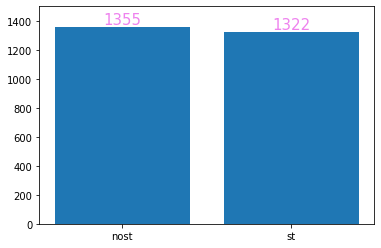

In [14]:
x = ['nost','st']
y = [len(nost),len(st)]
plt.bar(x ,y)
plt.ylim((0,1500))
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 15, 
             color='violet',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.show()

In [15]:
dn_nomatch=dev_loss_nost[dev_loss_nost['gold_label']!=dev_loss_nost['pred_label']]
ds_nomatch=dev_loss_st[dev_loss_st['gold_label']!=dev_loss_st['pred_label']]

In [16]:
dn_nomatch.iloc[0].values

array([2678, 'org:political/religious_affiliation', 'no_relation',
       '[0.9324898719787598, 0.0002827853604685515, 0.0004275538376532495, 0.0004482753574848175, 0.00010598051449051127, 0.0007119640940800309, 0.0002151528897229582, 0.00020652037346735597, 0.001787026645615697, 0.00011726900993380696, 2.9801205528201535e-05, 0.00012296123895794153, 6.151590059744194e-05, 0.00018041771545540541, 0.00014904142881277949, 0.00028722514980472624, 1.219578643940622e-05, 2.281767228851095e-05, 0.0005300203920342028, 0.05990824103355408, 0.0006274333572946489, 5.568623237195425e-05, 0.00036383772385306656, 6.0461075918283314e-05, 3.483349792077206e-05, 4.342973625170998e-05, 5.508753929461818e-06, 5.2256029448471963e-05, 0.00044086045818403363, 0.0002190466329921037]'],
      dtype=object)

In [17]:
num_label = []
label = dev_loss_st['gold_label'].unique()
with open('/opt/ml/code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
    for v in label:
        num_label.append(dict_label_to_num[v])

In [18]:
label

array(['org:top_members/employees', 'per:title', 'org:founded',
       'no_relation', 'per:alternate_names', 'per:employee_of',
       'per:spouse', 'org:member_of', 'org:founded_by', 'per:parents',
       'per:date_of_death', 'per:place_of_residence',
       'org:place_of_headquarters', 'org:alternate_names',
       'per:date_of_birth', 'per:origin', 'per:colleagues',
       'per:place_of_birth', 'per:product', 'org:members', 'per:children',
       'org:product', 'per:other_family', 'per:religion', 'per:siblings',
       'org:dissolved', 'org:number_of_employees/members',
       'org:political/religious_affiliation', 'per:place_of_death',
       'per:schools_attended'], dtype=object)

In [19]:
pd.DataFrame([dev_loss_st['gold_label'].unique()],columns=num_label).sort_index(axis=1)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,no_relation,org:top_members/employees,org:members,org:product,per:title,org:alternate_names,per:employee_of,org:place_of_headquarters,per:product,org:number_of_employees/members,...,org:member_of,per:parents,org:dissolved,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion


In [20]:
pd.DataFrame([dict_label_to_num])

,no_relation,org:top_members/employees,org:members,org:product,per:title,org:alternate_names,per:employee_of,org:place_of_headquarters,per:product,org:number_of_employees/members,...,org:member_of,per:parents,org:dissolved,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion
0,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29


In [21]:
pd.DataFrame(dev_loss_nost['probs'].apply(lambda x: np.array(eval(x),ndmin=2)))

,probs
0,"[[0.02351098135113716, 8.021946996450424e-05, ..."
1,"[[3.221247243345715e-05, 0.000273466226644814,..."
2,"[[0.003172215074300766, 5.874208363820799e-05,..."
3,"[[0.00031502090860158205, 2.6371824787929654e-..."
4,"[[0.579675018787384, 0.00018760505190584809, 2..."
...,...
6489,"[[1.6761961887823418e-05, 0.9997926354408264, ..."
6490,"[[1.3662452147400472e-05, 0.9998244643211365, ..."
6491,"[[0.7584547400474548, 0.0010088387643918395, 0..."
6492,"[[0.9996925592422485, 3.084952550125308e-05, 7..."


In [22]:
def pred_pd(dev_dataset,label_dict):
    # 데이터 프레임
    temp = dev_dataset['probs'].apply(lambda x: pd.Series(np.array(eval(x))))
    temp.columns=label_dict
    concatSet = pd.concat([dev_dataset[['id','gold_label','pred_label']],temp],axis=1)
    pred_prob=[]
    gold_prob=[]
    prob_diff=[]
    for i,r in concatSet.iterrows():
        pred_prob.append(r[concatSet['pred_label'][i]])
        gold_prob.append(r[concatSet['gold_label'][i]])
        prob_diff.append(r[concatSet['pred_label'][i]]-r[concatSet['gold_label'][i]])
    concatSet['pred_prob'] = pred_prob
    concatSet['gold_prob'] = gold_prob
    concatSet['prob_diff'] = prob_diff
    del temp,  pred_prob, gold_prob, prob_diff
    return concatSet

In [23]:
full_dev_st = pred_pd(dev_loss_st,dict_label_to_num)

In [24]:
full_dev_st 

,id,gold_label,pred_label,no_relation,org:top_members/employees,org:members,org:product,per:title,org:alternate_names,per:employee_of,...,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion,pred_prob,gold_prob,prob_diff
0,9127,org:top_members/employees,org:top_members/employees,0.000004,0.999855,0.000003,0.000003,0.000020,0.000005,0.000010,...,2.144758e-06,2.761629e-06,0.000006,6.240175e-06,8.499730e-07,1.823710e-05,1.296279e-06,0.999855,0.999855,0.0
1,18956,org:top_members/employees,org:top_members/employees,0.000004,0.999871,0.000004,0.000003,0.000008,0.000005,0.000004,...,1.992014e-06,2.355726e-06,0.000006,5.916333e-06,8.188669e-07,1.980674e-05,1.147832e-06,0.999871,0.999871,0.0
2,13521,per:title,per:title,0.000006,0.000013,0.000002,0.000012,0.999734,0.000013,0.000016,...,1.050920e-05,1.266727e-05,0.000009,1.583868e-06,6.849364e-06,6.209601e-07,5.256400e-06,0.999734,0.999734,0.0
3,31250,org:founded,org:founded,0.000007,0.000008,0.000011,0.000008,0.000009,0.000023,0.000016,...,4.772340e-05,1.689504e-05,0.000052,3.094694e-05,1.525939e-05,1.141772e-04,2.287988e-05,0.999006,0.999006,0.0
4,14236,no_relation,no_relation,0.999939,0.000006,0.000003,0.000001,0.000004,0.000003,0.000003,...,1.709542e-07,9.211033e-07,0.000001,2.769833e-08,2.261589e-07,5.748992e-07,2.800854e-07,0.999939,0.999939,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,269,per:title,per:title,0.000012,0.000008,0.000002,0.000009,0.999741,0.000008,0.000017,...,8.457397e-06,1.447196e-05,0.000009,1.099393e-06,6.668878e-06,5.970801e-07,6.178565e-06,0.999741,0.999741,0.0
6490,1379,org:alternate_names,org:alternate_names,0.000756,0.000007,0.001881,0.000045,0.000011,0.996573,0.000011,...,1.794475e-05,1.377658e-05,0.000046,7.530770e-06,8.739838e-06,2.774910e-05,1.171824e-05,0.996573,0.996573,0.0
6491,8825,per:children,per:children,0.000016,0.000097,0.000103,0.000249,0.000118,0.000072,0.000031,...,2.018312e-04,7.324181e-04,0.001026,4.464323e-04,2.423173e-04,2.153744e-04,1.376236e-04,0.642392,0.642392,0.0
6492,28301,org:place_of_headquarters,org:place_of_headquarters,0.000008,0.000039,0.000151,0.000022,0.000023,0.000009,0.000003,...,3.507067e-05,1.453057e-05,0.000031,5.453169e-05,3.456428e-05,1.187034e-05,1.126248e-05,0.999167,0.999167,0.0


In [25]:
train

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,"{'word': '유기준', 'start_idx': 93, 'end_idx': 95...","{'word': '부산 서구·동구', 'start_idx': 100, 'end_id...",per:employee_of,wikitree
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...","{'word': '최시형', 'start_idx': 7, 'end_idx': 9, ...","{'word': '손병희', 'start_idx': 17, 'end_idx': 19...",per:colleagues,wikipedia
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,"{'word': '완도군', 'start_idx': 0, 'end_idx': 2, ...","{'word': '신우철', 'start_idx': 7, 'end_idx': 9, ...",org:top_members/employees,wikitree
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...","{'word': 'JTBC', 'start_idx': 6, 'end_idx': 9,...","{'word': '중앙홀딩스', 'start_idx': 21, 'end_idx': ...",no_relation,wikipedia


In [26]:
train['subject_entity'].apply(lambda x: pd.Series(eval(x)))

,word,start_idx,end_idx,type
0,비틀즈,24,26,ORG
1,민주평화당,19,23,ORG
2,광주FC,21,24,ORG
3,아성다이소,13,17,ORG
4,요미우리 자이언츠,22,30,ORG
...,...,...,...,...
32465,유기준,93,95,PER
32466,최시형,7,9,PER
32467,완도군,0,2,ORG
32468,JTBC,6,9,ORG


In [27]:
subjt=train['subject_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('subj_')
objt=train['object_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('obj_')
full_train = pd.concat([train[['id','sentence','label','source']],subjt,objt],axis=1)

In [28]:
full_train

,id,sentence,label,source,subj_word,subj_start_idx,subj_end_idx,subj_type,obj_word,obj_start_idx,obj_end_idx,obj_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,no_relation,wikipedia,비틀즈,24,26,ORG,조지 해리슨,13,18,PER
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,no_relation,wikitree,민주평화당,19,23,ORG,대안신당,14,17,ORG
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,org:member_of,wikitree,광주FC,21,24,ORG,한국프로축구연맹,34,41,ORG
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,org:top_members/employees,wikitree,아성다이소,13,17,ORG,박정부,22,24,PER
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,no_relation,wikipedia,요미우리 자이언츠,22,30,ORG,1967,0,3,DAT
...,...,...,...,...,...,...,...,...,...,...,...,...
32465,32465,한국당은 7일 오전 9시부터 오후 5시까지 진행된 원내대표 및 정책위의장 후보자 등...,per:employee_of,wikitree,유기준,93,95,PER,부산 서구·동구,100,107,LOC
32466,32466,"법포는 다시 최시형, 서병학, 손병희 직계인 북접과 다시 서장옥, 전봉준, 김개남을...",per:colleagues,wikipedia,최시형,7,9,PER,손병희,17,19,PER
32467,32467,완도군(군수 신우철)이 국토교통부에서 실시한 '2019 교통문화지수 실태조사'에서 ...,org:top_members/employees,wikitree,완도군,0,2,ORG,신우철,7,9,PER
32468,32468,"중앙일보, JTBC 회장을 지낸 이후 중앙홀딩스 회장, 재단법인 한반도평화만들기 이...",no_relation,wikipedia,JTBC,6,9,ORG,중앙홀딩스,21,25,ORG


In [29]:
def train_pred(train,pred):
    subjt=train['subject_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('subj_')
    objt=train['object_entity'].apply(lambda x: pd.Series(eval(x))).add_prefix('obj_')
    full_train = pd.concat([train[['id','sentence','source']],subjt,objt],axis=1)
    out_pd = pd.merge(full_train,pred,on='id',how='right')
    del subjt,objt,full_train
    return out_pd

In [30]:
tp = train_pred(train,full_dev_st)

In [31]:
tp

,id,sentence,source,subj_word,subj_start_idx,subj_end_idx,subj_type,obj_word,obj_start_idx,obj_end_idx,...,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion,pred_prob,gold_prob,prob_diff
0,9127,이 돈가스집은 백종원 더본코리아 대표가 지난해 11월 ‘골목식당‘ 서울 홍은동 포방...,wikitree,더본코리아,12,16,ORG,백종원,8,10,...,2.144758e-06,2.761629e-06,0.000006,6.240175e-06,8.499730e-07,1.823710e-05,1.296279e-06,0.999855,0.999855,0.0
1,18956,경기 양평군(군수 정동균)은 지난 18일 별관4층 대회의실에서 2030년까지 양평의...,wikitree,양평군,3,5,ORG,정동균,10,12,...,1.992014e-06,2.355726e-06,0.000006,5.916333e-06,8.188669e-07,1.980674e-05,1.147832e-06,0.999871,0.999871,0.0
2,13521,올시즌 프로에 데뷔한 센터백 최규백이 2016년 하계 올림픽 국가대표팀으로 발탁되었다.,wikipedia,최규백,16,18,PER,센터백,12,14,...,1.050920e-05,1.266727e-05,0.000009,1.583868e-06,6.849364e-06,6.209601e-07,5.256400e-06,0.999734,0.999734,0.0
3,31250,NTSB는 1967년 4월 1일 대통령 직속기관으로 설립되었다.,wikipedia,NTSB,0,3,ORG,1967년 4월 1일,6,16,...,4.772340e-05,1.689504e-05,0.000052,3.094694e-05,1.525939e-05,1.141772e-04,2.287988e-05,0.999006,0.999006,0.0
4,14236,리그 우승으로 2007 AFC 챔피언스리그 티켓을 획득한 성남은 조별 예선과 8강전...,wikipedia,우라와 레드 다이아몬즈,69,80,ORG,2007,8,11,...,1.709542e-07,9.211033e-07,0.000001,2.769833e-08,2.261589e-07,5.748992e-07,2.800854e-07,0.999939,0.999939,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6489,269,"시는 앞서 지난 9일 지역구 국회의원인 민홍철(김해갑), 김정호(김해을) 의원을 시...",wikitree,김정호,32,34,PER,국회의원,16,19,...,8.457397e-06,1.447196e-05,0.000009,1.099393e-06,6.668878e-06,5.970801e-07,6.178565e-06,0.999741,0.999741,0.0
6490,1379,한명진 예비후보는 30년 공직 중 25년을 정부경제부처인 기획예산처-기획재정부에서 ...,wikitree,기획재정부,38,42,ORG,기획예산처,32,36,...,1.794475e-05,1.377658e-05,0.000046,7.530770e-06,8.739838e-06,2.774910e-05,1.171824e-05,0.996573,0.996573,0.0
6491,8825,"일반적으로 김정은의 어머니는 고용희(고영희)인 것으로 알려지고 있지만, 이복형 김정...",wikipedia,고용희,16,18,PER,김정은,6,8,...,2.018312e-04,7.324181e-04,0.001026,4.464323e-04,2.423173e-04,2.153744e-04,1.376236e-04,0.642392,0.642392,0.0
6492,28301,그러나 번번히 거절당하자 2011년 7월부터는 제천시 제천여성도서관에 대한 항의 방...,wikipedia,여성도서관,32,36,ORG,제천시,26,28,...,3.507067e-05,1.453057e-05,0.000031,5.453169e-05,3.456428e-05,1.187034e-05,1.126248e-05,0.999167,0.999167,0.0


In [32]:
tp[tp['gold_label']!=tp['pred_label']]

,id,sentence,source,subj_word,subj_start_idx,subj_end_idx,subj_type,obj_word,obj_start_idx,obj_end_idx,...,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion,pred_prob,gold_prob,prob_diff
19,9018,이 음반은 또한 믹 테일러가 롤링 스톤스 음반에 처음 등장했고 기타리스트와 창시자인...,wikipedia,롤링 스톤스,71,76,ORG,브라이언 존스,47,53,...,1.382988e-06,0.000009,0.000013,4.350930e-07,2.005449e-06,0.000162,1.593314e-06,0.999037,0.000162,0.998875
20,10441,막부는 지묘인 황통이 홀대받는 것을 우려하여 타협안으로 고후카쿠사 천황의 아들을 고...,wikipedia,후시미 천황,66,71,PER,고우다 천황,45,50,...,1.064569e-05,0.000021,0.000007,7.697072e-05,1.369704e-05,0.000013,6.090142e-06,0.995577,0.002976,0.992601
26,8414,2014년 2월 보홀의 르네 렐람파고스 하원의원이 제출한 또 다른 법안은 호세 리잘...,wikipedia,호세 리잘,41,45,PER,필리핀,52,54,...,2.068316e-06,0.000016,0.000088,2.795020e-04,4.392581e-06,0.000004,1.627150e-05,0.998734,0.000325,0.998409
32,18870,"그녀는 오스카르 1세의 아들이자 칼 15세의 동생인 오스카르 왕자와 결혼했으며, 오...",wikipedia,오스카르 2세,63,69,PER,스웨덴의 왕비,77,83,...,2.193133e-04,0.000669,0.000356,7.303037e-05,1.446611e-04,0.000298,2.050904e-04,0.523234,0.063447,0.459788
43,14754,"그들의 서울 계획은 사전에 발각되었고, 게다가 최시형, 손병희, 김연국, 손천민 등...",wikipedia,손병희,31,33,PER,최시형,26,28,...,3.891207e-05,0.000064,0.000058,2.371476e-05,3.105019e-05,0.000050,1.168317e-04,0.998591,0.000059,0.998532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6468,7294,당시 미국 대통령 윌리엄 매킨리가 이 사건은 필리핀 측에 의한 마닐라 시내에 대한 ...,wikipedia,필리핀,25,27,ORG,마닐라,35,37,...,1.235358e-04,0.000107,0.000122,2.100063e-04,1.878392e-04,0.000050,3.657758e-05,0.925368,0.067427,0.857941
6469,21346,발라라마는 수라세나 왕국에 거주하던 야다바계 부족인 브리슈니의 일원이었던 바수데바 ...,wikipedia,바수데바,41,44,PER,수라세나,6,9,...,3.166915e-04,0.000022,0.000134,8.568304e-01,2.159818e-03,0.000064,4.579934e-04,0.856830,0.125124,0.731706
6474,955,일본 정부가 한일 병합 조약 체결 후 1912년 논공행상을 하면서 수여한 한국병합기...,wikipedia,다이쇼 천황,59,64,PER,쇼와 천황,67,71,...,1.318258e-04,0.000064,0.000078,1.044171e-05,1.606730e-04,0.000087,1.142462e-04,0.859176,0.134817,0.724359
6478,8331,"이날 협의회는 이해찬 당 대표, 박광온 최고위원, 김두관 참좋은지방정부위원회 상임위...",wikitree,우기종,114,116,PER,김영록,104,106,...,2.486202e-05,0.000079,0.000060,1.754438e-05,2.937707e-05,0.000036,4.592497e-05,0.997553,0.000971,0.996582


In [33]:
tp[tp['gold_label']!=tp['pred_label']][['sentence','subj_word','obj_word','gold_label','pred_label','gold_prob','pred_prob','prob_diff']]

,sentence,subj_word,obj_word,gold_label,pred_label,gold_prob,pred_prob,prob_diff
19,이 음반은 또한 믹 테일러가 롤링 스톤스 음반에 처음 등장했고 기타리스트와 창시자인...,롤링 스톤스,브라이언 존스,org:founded_by,no_relation,0.000162,0.999037,0.998875
20,막부는 지묘인 황통이 홀대받는 것을 우려하여 타협안으로 고후카쿠사 천황의 아들을 고...,후시미 천황,고우다 천황,per:parents,per:alternate_names,0.002976,0.995577,0.992601
26,2014년 2월 보홀의 르네 렐람파고스 하원의원이 제출한 또 다른 법안은 호세 리잘...,호세 리잘,필리핀,per:place_of_residence,per:origin,0.000325,0.998734,0.998409
32,"그녀는 오스카르 1세의 아들이자 칼 15세의 동생인 오스카르 왕자와 결혼했으며, 오...",오스카르 2세,스웨덴의 왕비,per:title,per:spouse,0.063447,0.523234,0.459788
43,"그들의 서울 계획은 사전에 발각되었고, 게다가 최시형, 손병희, 김연국, 손천민 등...",손병희,최시형,no_relation,per:colleagues,0.000059,0.998591,0.998532
...,...,...,...,...,...,...,...,...
6468,당시 미국 대통령 윌리엄 매킨리가 이 사건은 필리핀 측에 의한 마닐라 시내에 대한 ...,필리핀,마닐라,org:members,org:place_of_headquarters,0.067427,0.925368,0.857941
6469,발라라마는 수라세나 왕국에 거주하던 야다바계 부족인 브리슈니의 일원이었던 바수데바 ...,바수데바,수라세나,per:place_of_residence,per:place_of_birth,0.125124,0.856830,0.731706
6474,일본 정부가 한일 병합 조약 체결 후 1912년 논공행상을 하면서 수여한 한국병합기...,다이쇼 천황,쇼와 천황,no_relation,per:other_family,0.134817,0.859176,0.724359
6478,"이날 협의회는 이해찬 당 대표, 박광온 최고위원, 김두관 참좋은지방정부위원회 상임위...",우기종,김영록,no_relation,per:colleagues,0.000971,0.997553,0.996582


In [151]:
tp.iloc[:,13:].describe(include='all').iloc[:,:].transpose()

,count,mean,std,min,25%,50%,75%,max
no_relation,6494.0,0.257754,0.425362,3.435717e-07,8.176830e-06,0.000041,0.683676,0.999945
org:top_members/employees,6494.0,0.134566,0.339245,2.154067e-06,1.114097e-05,0.000021,0.000102,0.999892
org:members,6494.0,0.015430,0.115889,4.043274e-07,2.966692e-06,0.000009,0.000043,0.998508
org:product,6494.0,0.012085,0.106805,6.647778e-07,2.388252e-06,0.000008,0.000031,0.998967
per:title,6494.0,0.068318,0.250198,1.242194e-06,8.050804e-06,0.000020,0.000056,0.999770
org:alternate_names,6494.0,0.041983,0.197497,1.591467e-06,4.492491e-06,0.000013,0.000042,0.999637
per:employee_of,6494.0,0.116910,0.316941,1.839379e-06,6.012148e-06,0.000016,0.000119,0.999819
org:place_of_headquarters,6494.0,0.037745,0.186295,5.120315e-07,3.605833e-06,0.000009,0.000044,0.999407
per:product,6494.0,0.003787,0.055725,2.899918e-07,1.850236e-06,0.000009,0.000028,0.997442
org:number_of_employees/members,6494.0,0.001193,0.031345,2.250208e-07,2.334531e-06,0.000007,0.000018,0.990889


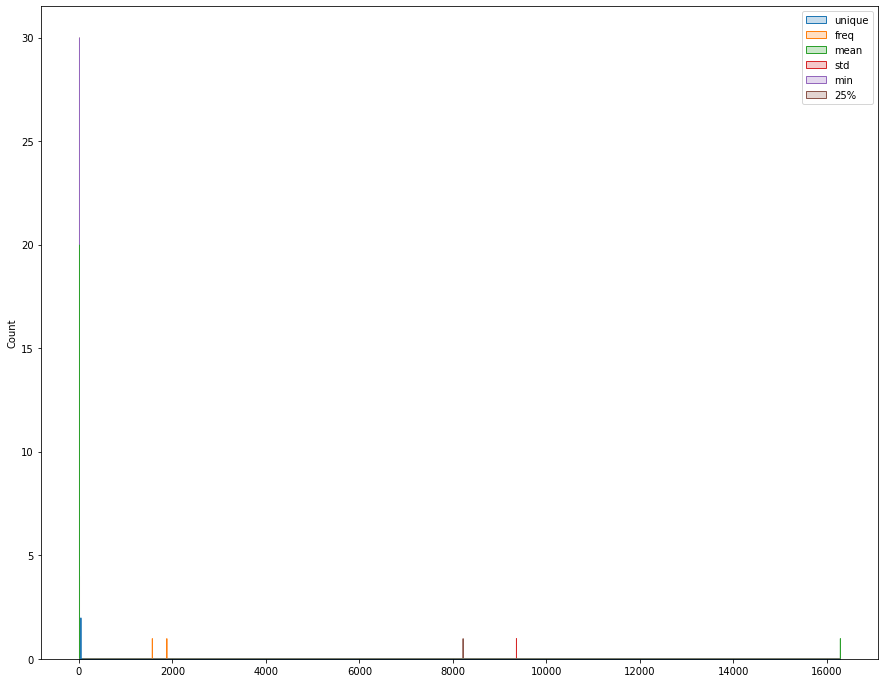

In [69]:
plt.figure(figsize=(15, 12))
s = sns.histplot(dev_loss_nost.iloc[:,:].describe(include='all').iloc[[1,3,4,5,6,7],:].transpose(),element="step")

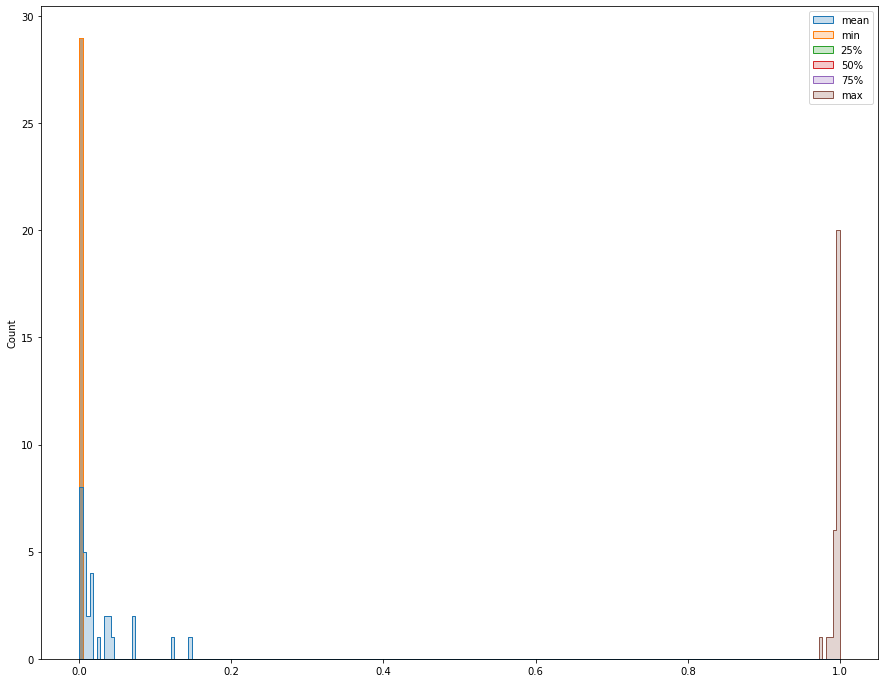

In [110]:
plt.figure(figsize=(15, 12))
s = sns.histplot(dev_loss_nost.iloc[:,4:].describe(include='all').iloc[[1,3,4,5,6,7],:].transpose(),element="step")

In [74]:
dev_loss_nost[dev_loss_nost['pred_label']=='no_relation']

,pred_label,no_relation,org:top_members/employees,org:members,org:product,per:title,org:alternate_names,per:employee_of,org:place_of_headquarters,per:product,...,org:member_of,per:parents,org:dissolved,per:schools_attended,per:date_of_death,per:date_of_birth,per:place_of_birth,per:place_of_death,org:founded_by,per:religion
4,no_relation,0.579675,0.000188,0.000024,0.000029,0.000253,0.000086,0.417214,0.000018,0.000306,...,0.000303,0.000014,0.000011,2.369657e-05,0.000023,0.000014,2.818010e-06,4.303333e-06,2.776196e-05,5.402572e-05
9,no_relation,0.932490,0.000283,0.000428,0.000448,0.000106,0.000712,0.000215,0.000207,0.001787,...,0.000627,0.000056,0.000364,6.046108e-05,0.000035,0.000043,5.508754e-06,5.225603e-05,4.408605e-04,2.190466e-04
12,no_relation,0.999673,0.000015,0.000010,0.000003,0.000003,0.000004,0.000006,0.000014,0.000002,...,0.000219,0.000002,0.000003,3.364563e-07,0.000001,0.000001,5.202245e-08,3.276099e-07,7.592730e-07,3.828580e-07
28,no_relation,0.999104,0.000041,0.000008,0.000004,0.000004,0.000012,0.000012,0.000011,0.000007,...,0.000027,0.000006,0.000003,4.395061e-07,0.000011,0.000007,4.183678e-07,1.094010e-06,4.132617e-06,2.280344e-06
29,no_relation,0.999860,0.000008,0.000004,0.000004,0.000003,0.000003,0.000009,0.000003,0.000016,...,0.000009,0.000001,0.000002,3.415735e-07,0.000003,0.000001,5.112984e-08,4.713193e-07,1.948126e-06,6.491651e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,no_relation,0.999842,0.000026,0.000004,0.000002,0.000002,0.000006,0.000010,0.000003,0.000005,...,0.000008,0.000001,0.000001,3.340379e-07,0.000001,0.000001,6.207964e-08,3.012519e-07,1.935537e-06,7.321360e-07
6483,no_relation,0.999767,0.000012,0.000007,0.000002,0.000015,0.000006,0.000016,0.000013,0.000004,...,0.000036,0.000004,0.000004,8.685766e-07,0.000007,0.000020,1.092685e-07,4.559059e-07,9.448148e-07,7.096368e-07
6486,no_relation,0.999641,0.000010,0.000099,0.000006,0.000002,0.000088,0.000006,0.000007,0.000003,...,0.000031,0.000003,0.000003,7.921960e-07,0.000003,0.000002,8.142602e-08,8.469247e-07,2.738176e-06,7.621752e-07
6491,no_relation,0.758455,0.001009,0.003494,0.000358,0.000393,0.002155,0.000493,0.000164,0.000673,...,0.000563,0.000294,0.001520,4.052785e-04,0.000820,0.000302,3.057090e-05,2.868669e-04,3.596580e-04,2.890594e-04


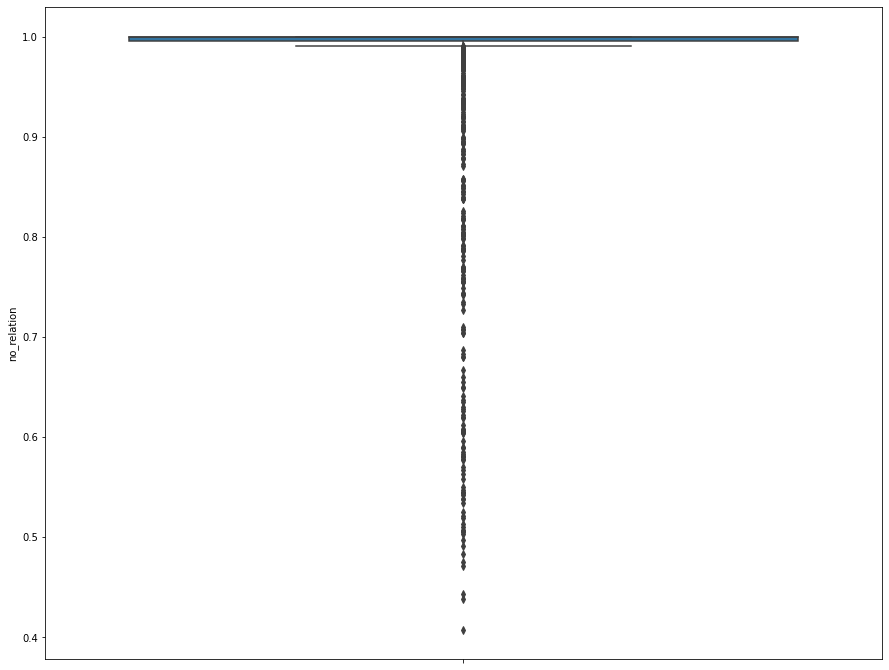

In [100]:
plt.figure(figsize=(15, 12))
s = sns.boxplot(y=dev_loss_nost[dev_loss_nost['pred_label']=='no_relation']['no_relation'])